In [40]:
# U.S. Medical Insurance Costs

In [ ]:
# Goals for this data analyzing is figuring out what increases or decreases your insurance costs and if there are biases in what region you're from.
# Find out the average age of the patients
# Where most of the individuals are from
# The difference in insurance cost between non-smokers and smokers
# the average age for people with 1 or more kids.


In [3]:
import csv

In [4]:
import pandas as pd
import plotly.express as px #data visualization package
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [5]:
# read the csv file
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head() #preview first 5 rows 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_data.isnull().sum() #checking if there is any missing data or not

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_data.info() #Here I see what the data type is 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance_data.describe() #float and int here 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
insurance_data.describe(include=[object]) #strings here

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
print( { insurance_data.duplicated().sum()}) # see if there are any duplicates 
insurance_data.drop_duplicates(inplace = True, ignore_index = True) # getting rid of all the duplicates 
print( {insurance_data.duplicated().sum()}) # see if the previous line of code worked 


{1}
{0}


In [11]:
insurance_data['sex'].value_counts() 

sex
male      675
female    662
Name: count, dtype: int64

In [12]:
insurance_data['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [13]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [14]:
insurance_data['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [15]:
# making all of the data colums have their own variable 
ages = insurance_data.age
genders = insurance_data.sex
regions = insurance_data.region
Child = insurance_data.children
Smokers = insurance_data.smoker
BMIs = insurance_data.bmi
cost = insurance_data.charges

In [41]:
mean_cost_by_children = insurance_data.groupby("children")["charges"].mean()

In [43]:
print(mean_cost_by_children) 
print("In the list above, we can see the mean cost of insurance per child.")

children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64
In the list above, we can see the mean cost of insurance per child.


In [44]:
mean_age_by_children = insurance_data.groupby("children")["age"].mean()
print(mean_age_by_children)
print("In the list above, we can see the what the mean age for the adult per child")

children
0    38.478185
1    39.453704
2    39.445833
3    41.566879
4    39.000000
5    35.611111
Name: age, dtype: float64
In the list above, we can see the what the mean age for the adult per child


In [19]:
print(regions.unique()) # finding out the regions in the dataset

['southwest' 'southeast' 'northwest' 'northeast']


In [45]:
mean_cost_by_sex = insurance_data.groupby("sex")["charges"].mean()
print(mean_cost_by_sex)
print("In the list above, we can see the mean insurance charges by sex")

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64
In the list above, we can see the mean insurance charges by sex


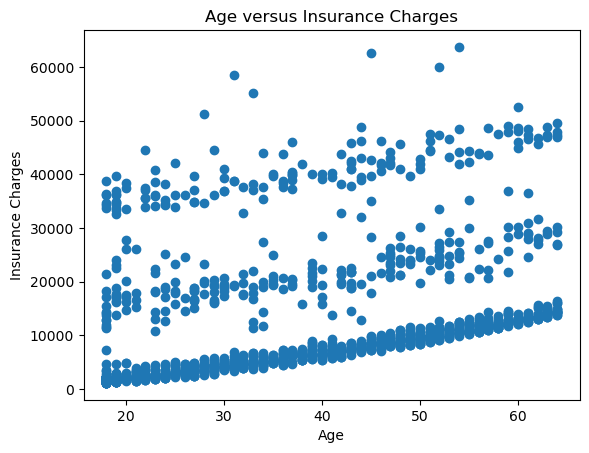

0.2983082125097863
Correlation between age and insurance charges:0.2983082125097863


In [48]:
def age_vs_cost(insurance_data):
    plt.scatter(ages, cost)
    plt.xlabel("Age")
    plt.ylabel("Insurance Charges")
    plt.title("Age versus Insurance Charges")
    plt.show()
age_vs_cost(insurance_data)
from statistics import correlation
correlation = ages.corr(cost)
print(correlation)
print("Correlation between age and insurance charges:" + str(correlation))

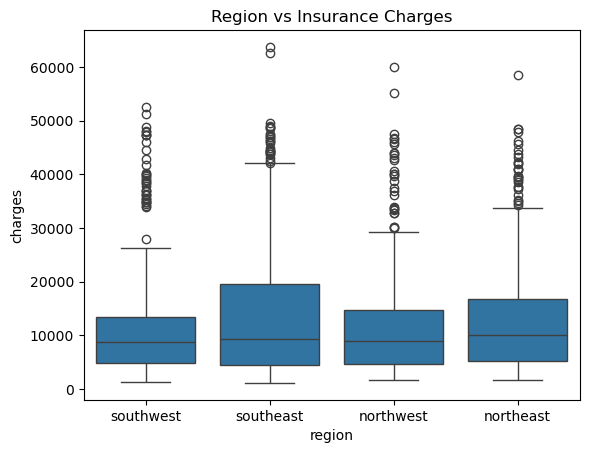

In [23]:
sns.boxplot(x= "region", y = "charges", data = insurance_data)
plt.title ("Region vs Insurance Charges")
plt.show()

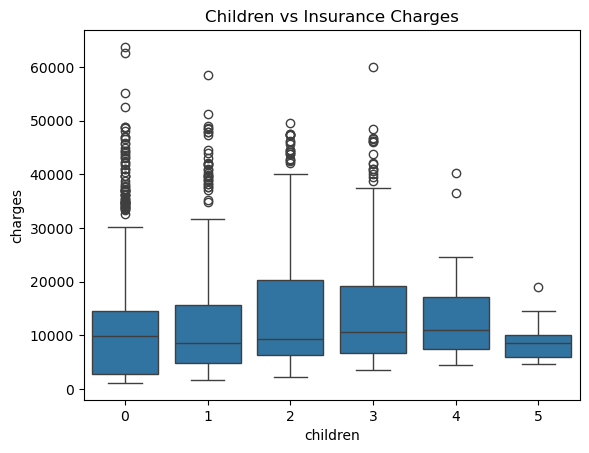

Correlation between the number of children and insurance charges: 0.06738935083963245


In [33]:
sns.boxplot(x= "children", y= "charges", data= insurance_data)
plt.title( "Children vs Insurance Charges")
plt.show()
correlation_child = Child.corr(cost)
print("Correlation between the number of children and insurance charges: " + str(correlation_child))

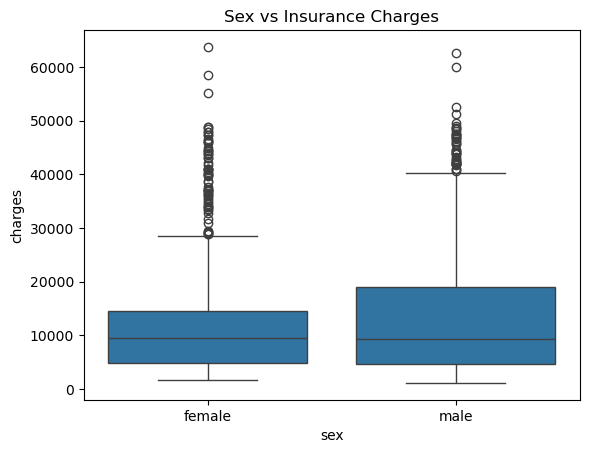

In [34]:
sns.boxplot(x="sex", y="charges", data= insurance_data)
plt.title("Sex vs Insurance Charges")
plt.show()

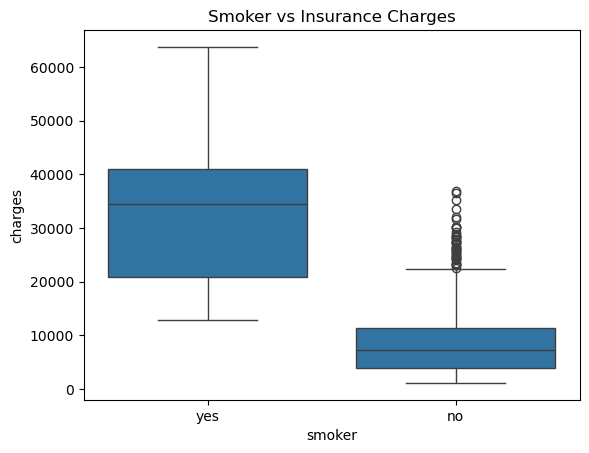

Looking at the boxplot, we can see that being a smoker means that the insurance costs go up


In [49]:
sns.boxplot(x="smoker", y="charges", data= insurance_data)
plt.title("Smoker vs Insurance Charges")
plt.show()
print("Looking at the boxplot, we can see that being a smoker means that the insurance costs go up")